<a href="https://colab.research.google.com/github/qihaiqianqiu/DLProject/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up project environment

> data & model

> library


Recommanded directory hierachy (already set up if you run following code block successfully)

> deepfashion

 >>fashion_resize

>>> train (files in 'train.lst')   

>>> test (files in 'test.lst')

>>> trainK(keypoints)

>>> testK

>> semantic_merge3

>> fashion-resize-pairs-train.csv

>> fashion-resize-pairs-test.csv

>> train.lst

>> test.lst

>> vgg19-dcbb9e9d.pth

>> vgg_conv.pth
...

In [ ]:
# Install all requirements
!pip install dominate
!pip install visdom

# Download codes and configuration files
!git clone https://github.com/qihaiqianqiu/DLProject.git

# Anyone in NYU mail could view and download our data from
# https://drive.google.com/drive/folders/1nPaV7lEYJ2eWkmh29yAsbHhTH3e8XbGT?usp=sharing
# If you need to use the following 'mount' command, put all date under your google drive
# Import files from Google Drive
from google.colab import drive
drive.mount('content')

# Move files to deepfashion directory
!cp -r -p content/MyDrive/Data_for_DL_project/semantic_merge3 DLProject/deepfashion
!cp content/MyDrive/Data_for_DL_project/vgg19-dcbb9e9d.pth DLProject/deepfashion
!cp content/MyDrive/Data_for_DL_project/vgg_conv.pth DLProject/deepfashion
!cp content/MyDrive/Data_for_DL_project/pose_estimator.h5 DLProject
!cp content/MyDrive/Data_for_DL_project/latest_net_netG.pth DLProject/deepfashion/pretrained
!cp content/MyDrive/Data_for_DL_project/latest_net_netD_PB.pth DLProject/deepfashion/pretrained
!cp content/MyDrive/Data_for_DL_project/latest_net_netD_PP.pth DLProject/deepfashion/pretrained

     |████████████████████████████████| 686kB 25.7MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=aa2736177b9405b7218da6f784c7292f5a2befd40f24444445d77e0cefceaef7
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=057bee25e01107f4a1f10e6359095b2a3d16146d401c8ece5d0efd38ffe602a5
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile
Cloning into 'DLProject'...
remote: Enumerating objects: 582, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 582 (delta 113), reused 43 (delta 43), pack-reused 399
Receiving objects: 100% (582/582), 7.33 MiB | 41.23 MiB/s, done.
Resolving deltas: 100% (282/

# Data Perparation
put raw images in 'png'/'jpg' format in 'raw' directory, then:
- Convert all raw images to jpg and put main body of image in the center of the scene
- Resize image to 256 x 176
- Invoke keypoints generator to compute keypoints and pose

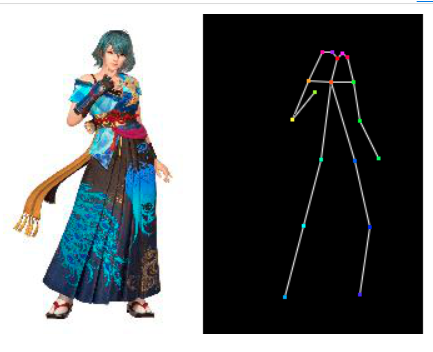

In [ ]:
# Generate Key points coordinates
%cd /content/DLProject/tool
%rm -rf /content/DLProject/deepfashion/test/.ipynb_checkpoints
%rm -rf /content/DLProject/deepfashion/raw/.ipynb_checkpoints
%rm -rf /content/DLProject/deepfashion/train/.ipynb_checkpoints
%rm -rf /content/DLProject/deepfashion/raw_train/.ipynb_checkpoints

/content/DLProject/tool


In [ ]:
# Generate JPG file and resize
# In this block and all the following blocks, for training you can use args : train
#!python2 convert_white_jpg.py train
!python2 convert_white_jpg.py test

jpg convertion: /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000243901_1front.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionWOMENCardigansid0000007003_1front.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionMENShortsid0000025401_7additional.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionMENShortsid0000033711_4full.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionMENSweatersid0000007803_1front.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionWOMENCardigansid0000003602_1front.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000243904_2side.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000691501_2side.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionWOMENDressesid0000000202_1front.jpg
jpg convertion: /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000534601_4full.jpg
jpg convertion: /content/DLProject/d

In [ ]:
# Resize cont.d
#!python2 resize_fashion.py train
!python2 resize_fashion.py test

resize /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000243901_1front.jpg succefully
resize /content/DLProject/deepfashion/test/fashionWOMENCardigansid0000007003_1front.jpg succefully
resize /content/DLProject/deepfashion/test/fashionMENShortsid0000025401_7additional.jpg succefully
resize /content/DLProject/deepfashion/test/fashionMENShortsid0000033711_4full.jpg succefully
resize /content/DLProject/deepfashion/test/fashionMENSweatersid0000007803_1front.jpg succefully
resize /content/DLProject/deepfashion/test/fashionWOMENCardigansid0000003602_1front.jpg succefully
resize /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000243904_2side.jpg succefully
resize /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000691501_2side.jpg succefully
resize /content/DLProject/deepfashion/test/fashionWOMENDressesid0000000202_1front.jpg succefully
resize /content/DLProject/deepfashion/test/fashionMENJackets_Vestsid0000534601_4full.jpg succefully
resize /content/

In [ ]:
# Compute coornadites
#!python2 compute_coordinates.py train
!python2 compute_coordinates.py test

Using TensorFlow backend.
2021-05-17 13:23:52.177532: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-05-17 13:23:52.209229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-17 13:23:52.209884: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-17 13:23:52.210156: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-05-17 13:23:52.212289: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-05-17 13:23:52.214073: I tensorflow/stream_e

In [ ]:
# Generate pose keypoints npy file
%rm -rf /content/DLProject/deepfashion/fashion_resize/testK/.ipynb_checkpoints
%rm -rf /content/DLProject/deepfashion/fashion_resize/trainK/.ipynb_checkpoints
!python2 generate_pose_map_fashion.py test

processing 0 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionMENJackets_Vestsid0000243901_1front.jpg')
processing 1 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionWOMENCardigansid0000007003_1front.jpg')
processing 2 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionMENShortsid0000025401_7additional.jpg')
processing 3 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionMENShortsid0000033711_4full.jpg')
processing 4 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionMENSweatersid0000007803_1front.jpg')
processing 5 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionWOMENCardigansid0000003602_1front.jpg')
processing 6 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionMENJackets_Vestsid0000243904_2side.jpg')
processing 7 / 28 ...
('/content/DLProject/deepfashion/fashion_resize/testK', 'fashionMENJackets_Vestsid0000691501_2side.jpg

# Fine-tune model
- All the options could be seen from following output
- Also you can refer to directory: /DLProject/options, where you can get all the parameters with helper information


In [ ]:
%cd /content/DLProject
!bash ./scripts/train.sh

/content/DLProject
------------ Options -------------
BP_input_nc: 18
DG_ratio: 1
D_n_downsampling: 2
G_n_downsampling: 2
L1_type: l1_plus_perL1
P_input_nc: 3
SP_input_nc: 8
batchSize: 3
beta1: 0.5
checkpoints_dir: ./deepfashion
continue_train: True
dataroot: ./deepfashion/fashion_resize
dataset_mode: keypoint
dirSem: ./deepfashion
display_freq: 100
display_id: 0
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 256
gpu_ids: [8, 9]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 1.0
lambda_B: 1.0
lambda_GAN: 5.0
lambda_cx: 0.1
loadSize: 286
lr: 0.001
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: adgan
nThreads: 2
n_layers_D: 3
name: pretrained
ndf: 64
ngf: 64
niter: 500
niter_decay: 500
no_dropout: False
no_dropout_D: False
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
padding_type: reflect
pairLst: ./deepfashion/fashion-resize-pairs-train.csv
percep_is_l1: 1
perceptual_layers: 3
phase: tr

In [ ]:
%cd /content/DLProject 
!bash ./scripts/test.sh

/content/DLProject
------------ Options -------------
BP_input_nc: 18
D_n_downsampling: 2
G_n_downsampling: 2
P_input_nc: 3
SP_input_nc: 8
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: /content/DLProject/deepfashion
dataroot: /content/DLProject/deepfashion/fashion_resize
dataset_mode: keypoint
dirSem: /content/DLProject/deepfashion
display_id: 1
display_port: 8097
display_winsize: 256
fineSize: 256
gpu_ids: [0, 1]
how_many: 200
init_type: normal
input_nc: 3
isTrain: False
loadSize: 286
max_dataset_size: inf
model: adgan
nThreads: 2
n_layers_D: 3
name: pretrained
ndf: 64
ngf: 64
no_dropout: False
no_flip: False
norm: instance
ntest: inf
output_nc: 3
padding_type: reflect
pairLst: /content/DLProject/deepfashion/fashion-resize-pairs-test.csv
phase: test
resize_or_crop: no
results_dir: ./results
serial_batches: False
use_flip: 0
which_direction: AtoB
which_epoch: latest
which_model_netD: resnet
which_model_netG: ADGen
with_D_PB: 1
with_D_PP: 1
without_concat_SBP: 0
-------------- End ---

Sample Result:

1. From: fashionWOMENTees_Tanksid0000001202_2side.jpg 

   To: fashionWOMENDressesid0000004202_1front.jpg_vis

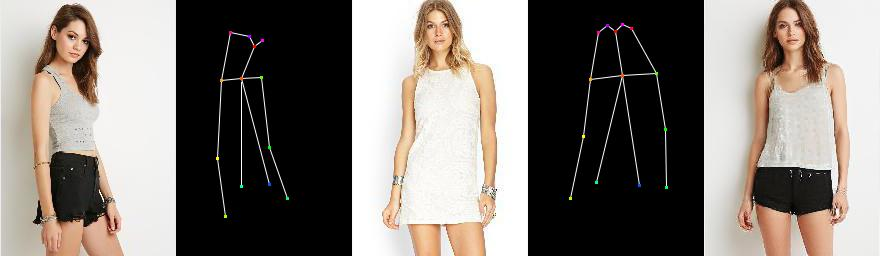


2. From: fashionMENShortsid0000025401_7additional.jpg

   To: Anime_Character_Man
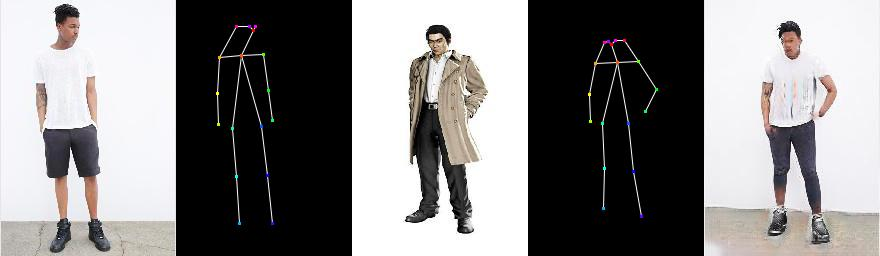

3. From: Anime_Character_Woman_1

   To: Anime_Character_Woman_2
   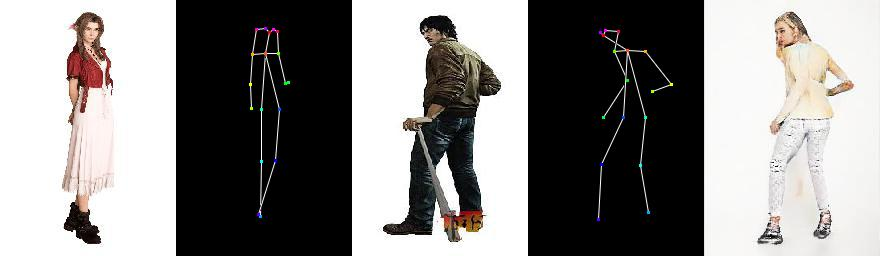

# Visulize loss curves
- Visulize 'loss_log.txt' by extracting corresponding value of each type of Loss. 

- You can set up a dict including all information in loss log and plot:

```
graph_dict = {
  'iters' : iters,
  'pair_L1_loss' : pair_L1_loss,
  'D_PP' : D_PP,
  'D_PB' : D_PB,
  'pair_GAN_loss' : pair_GAN_loss,
  'origin_L1' : origin_L1,
  'perceptual' : perceptual,
  'CX_Loss' : CX_Loss
}
```






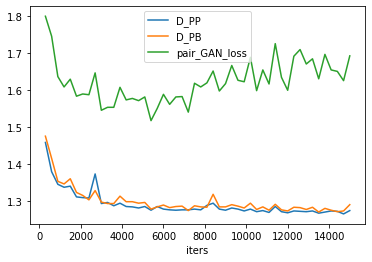

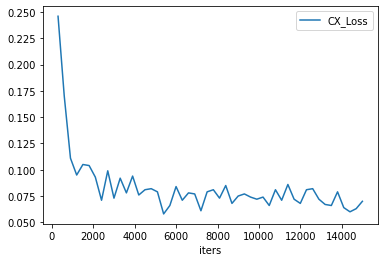

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


log_dir = "/content/DLProject/deepfashion/pretrained/loss_log.txt"

f = open(log_dir, 'r')

content = f.readlines()

iters = []
pair_L1_loss = []
D_PP = []
D_PB = []
pair_GAN_loss = []
origin_L1 = []
perceptual = []
CX_Loss = []

/
# Load all data field in loss log
for i in range(1,len(content)):
  data = content[i].split(' ')
  epochs = data[1]
  iters.append(int(data[3].strip(',')) + (int(epochs.strip(',')) - 1 ) * 4000)
  pair_L1_loss.append(float(data[7].strip(',')))
  D_PP.append(float(data[9].strip(',')))
  D_PB.append(float(data[11].strip(',')))
  pair_GAN_loss.append(float(data[13].strip(',')))
  origin_L1.append(float(data[15].strip(',')))
  perceptual.append(float(data[17].strip(',')))
  CX_Loss.append(float(data[19].strip(',')))

graph_dict = {
  'iters' : iters,
  'D_PP' : D_PP,
  'D_PB' : D_PB,
  'pair_GAN_loss' : pair_GAN_loss,
}

graph_df = pd.DataFrame(graph_dict)
graph_df.plot.line(x='iters')

graph_dict2 = {
  'iters' : iters,
  'CX_Loss' : CX_Loss,
}
graph_df2 = pd.DataFrame(graph_dict2)
graph_df2.plot.line(x='iters')